In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | christchurch
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | constitucion
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | lompoc
Processing Record 13 of Set 1 | torbay
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | comodoro rivadavia
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | novoilinsk
Processing Record 19 of Set 1 | puerto ayacucho
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | pimentel
Pr

Processing Record 36 of Set 4 | dudinka
Processing Record 37 of Set 4 | turukhansk
Processing Record 38 of Set 4 | mumford
Processing Record 39 of Set 4 | umm kaddadah
Processing Record 40 of Set 4 | mahebourg
Processing Record 41 of Set 4 | san quintin
Processing Record 42 of Set 4 | pundaguitan
Processing Record 43 of Set 4 | ribeira grande
Processing Record 44 of Set 4 | dingle
Processing Record 45 of Set 4 | jalu
Processing Record 46 of Set 4 | tabory
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | vila velha
Processing Record 49 of Set 4 | tambovka
Processing Record 50 of Set 4 | sapa
Processing Record 1 of Set 5 | kerema
Processing Record 2 of Set 5 | houma
Processing Record 3 of Set 5 | puerto baquerizo moreno
Processing Record 4 of Set 5 | capreol
Processing Record 5 of Set 5 | borba
Processing Record 6 of Set 5 | bairiki
Processing Record 7 of Set 5 | grindavik
Processing Record 8 of Set 5 | tabulbah
City not found. Skipping...
Processing Record 9 of

Processing Record 30 of Set 8 | puerto madero
Processing Record 31 of Set 8 | batagay-alyta
Processing Record 32 of Set 8 | ornskoldsvik
Processing Record 33 of Set 8 | dahuk
Processing Record 34 of Set 8 | zeya
Processing Record 35 of Set 8 | kalmunai
Processing Record 36 of Set 8 | victoria
Processing Record 37 of Set 8 | santa rosa
Processing Record 38 of Set 8 | chicama
Processing Record 39 of Set 8 | ormara
Processing Record 40 of Set 8 | great yarmouth
Processing Record 41 of Set 8 | vung tau
Processing Record 42 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 43 of Set 8 | abu samrah
Processing Record 44 of Set 8 | kiama
Processing Record 45 of Set 8 | zhangye
Processing Record 46 of Set 8 | komsomolskiy
Processing Record 47 of Set 8 | sioux lookout
Processing Record 48 of Set 8 | goroka
Processing Record 49 of Set 8 | kriel
Processing Record 50 of Set 8 | freising
Processing Record 1 of Set 9 | jiwani
Processing Record 2 of Set 9 | waddan
Processing Record 3 

Processing Record 16 of Set 12 | ranong
Processing Record 17 of Set 12 | taguatinga
Processing Record 18 of Set 12 | melekhovo
Processing Record 19 of Set 12 | aflu
City not found. Skipping...
Processing Record 20 of Set 12 | melo
Processing Record 21 of Set 12 | singaraja
Processing Record 22 of Set 12 | alferrarede
Processing Record 23 of Set 12 | sarkand
Processing Record 24 of Set 12 | nata
Processing Record 25 of Set 12 | kalaleh
Processing Record 26 of Set 12 | hede
Processing Record 27 of Set 12 | clarksville
Processing Record 28 of Set 12 | gurupa
Processing Record 29 of Set 12 | tamandare
Processing Record 30 of Set 12 | lorengau
Processing Record 31 of Set 12 | dekar
Processing Record 32 of Set 12 | mbini
Processing Record 33 of Set 12 | hobyo
Processing Record 34 of Set 12 | guaratinga
Processing Record 35 of Set 12 | kirksville
Processing Record 36 of Set 12 | karaul
City not found. Skipping...
Processing Record 37 of Set 12 | rameswaram
Processing Record 38 of Set 12 | col

In [12]:
len(city_data)

559

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,25.32,95,100,16.02,GL,2021-11-20 17:55:57
1,Christchurch,-43.5333,172.6333,55.33,73,76,4.61,NZ,2021-11-20 17:55:58
2,Cidreira,-30.1811,-50.2056,70.59,56,0,11.63,BR,2021-11-20 17:55:58
3,Rikitea,-23.1203,-134.9692,73.02,65,100,8.37,PF,2021-11-20 17:54:15
4,Barrow,71.2906,-156.7887,1.42,85,20,8.05,US,2021-11-20 17:55:59
5,Hasaki,35.7333,140.8333,46.69,60,38,5.59,JP,2021-11-20 17:55:59
6,Atuona,-9.8000,-139.0333,79.47,68,3,13.42,PF,2021-11-20 17:55:59
7,Bluff,-46.6000,168.3333,52.27,94,100,6.22,NZ,2021-11-20 17:56:00
8,Constitucion,-35.3333,-72.4167,65.26,65,12,9.17,CL,2021-11-20 17:56:00
9,Qaanaaq,77.4840,-69.3632,-5.64,70,14,6.87,GL,2021-11-20 17:56:00


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2021-11-20 17:55:57,65.6145,-37.6368,25.32,95,100,16.02
1,Christchurch,NZ,2021-11-20 17:55:58,-43.5333,172.6333,55.33,73,76,4.61
2,Cidreira,BR,2021-11-20 17:55:58,-30.1811,-50.2056,70.59,56,0,11.63
3,Rikitea,PF,2021-11-20 17:54:15,-23.1203,-134.9692,73.02,65,100,8.37
4,Barrow,US,2021-11-20 17:55:59,71.2906,-156.7887,1.42,85,20,8.05
5,Hasaki,JP,2021-11-20 17:55:59,35.7333,140.8333,46.69,60,38,5.59
6,Atuona,PF,2021-11-20 17:55:59,-9.8000,-139.0333,79.47,68,3,13.42
7,Bluff,NZ,2021-11-20 17:56:00,-46.6000,168.3333,52.27,94,100,6.22
8,Constitucion,CL,2021-11-20 17:56:00,-35.3333,-72.4167,65.26,65,12,9.17
9,Qaanaaq,GL,2021-11-20 17:56:00,77.4840,-69.3632,-5.64,70,14,6.87


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

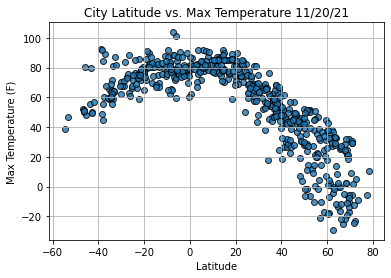

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

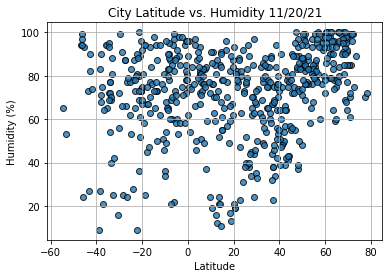

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

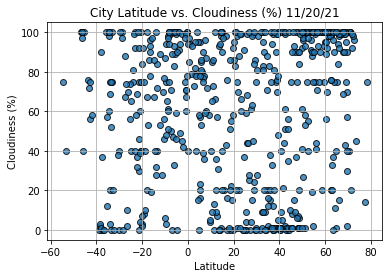

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

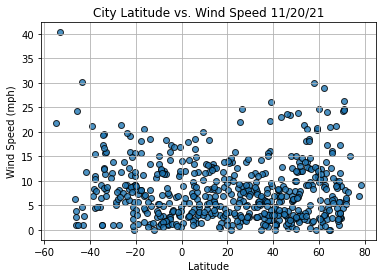

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()